<a href="https://colab.research.google.com/github/albope/master-data-analytics-content/blob/master/CNN_Networks_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 2: Fundamentals of CNN

In this workshop we will learn how to implement a simple Convolutional Neural Netwrok and we will compare it with a Fully Connected Neural Network for the classification of CIFAR10 dataset. The structure of the workshop will be the following:



1.   CIFAR10 with Fully Connected Neural Netoworks
2.   CIFAR10 with Convolutional Neural Networks



## 1. CIFAR10 with Fully Connected Neural Networks

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
# Import dependence for downloading CIFAR10
from keras.datasets import cifar10 


Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
# Import dependence for handling arrays
import numpy as np

In [5]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)
print("X_testval original shape:", X_testval.shape)
print("y_testval original shape:", y_testval.shape)

X_train original shape: (50000, 32, 32, 3)
y_train original shape: (50000, 1)
X_testval original shape: (10000, 32, 32, 3)
y_testval original shape: (10000, 1)


In [6]:
# Show the data type of the data partitions
print("X_train original dtype:", X_train.dtype)
print("y_train original dytpe:", y_train.dtype)
print("X_testval original dtype:", X_testval.dtype)
print("y_testval original dtype:", y_testval.dtype)

X_train original dtype: uint8
y_train original dytpe: uint8
X_testval original dtype: uint8
y_testval original dtype: int64


In [7]:
# Show the data range of the data partitions
print("X_train original range: [", X_train.min(), ",", X_train.max(), "]")
print("X_testval original range: [", X_train.min(), ",", X_testval.max(), "]")

X_train original range: [ 0 , 255 ]
X_testval original range: [ 0 , 255 ]


In [8]:
# Show the different labels of the data partitions
print("y_train labels: \n", np.unique(y_train))
print("y_testval labels: \n", np.unique(y_testval))

y_train labels: 
 [0 1 2 3 4 5 6 7 8 9]
y_testval labels: 
 [0 1 2 3 4 5 6 7 8 9]


In [0]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

In [0]:
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

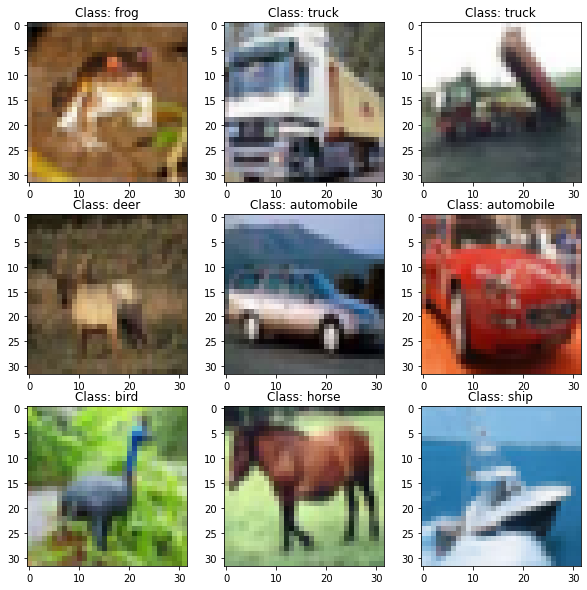

In [11]:
# Show 9 images with its respective ground truth labels
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    class_str = class_to_string(int(y_train[i]))
    plt.title("Class: " + class_str)

In [0]:
# Convert the 2D images to 1D array
train_samples = X_train.shape[0]
testval_samples = X_testval.shape[0]
sample_dims = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]  # 32*32*3
X_train_rs = X_train.reshape(train_samples, sample_dims)
X_testval_rs = X_testval.reshape(testval_samples, sample_dims)

In [13]:
# Show shape of the reshaped dataset
print("Training matrix shape:", X_train_rs.shape)
print("Testing matrix shape:", X_testval_rs.shape)

Training matrix shape: (50000, 3072)
Testing matrix shape: (10000, 3072)


In [0]:
# Convert dtype to float32
X_train_fl = X_train_rs.astype('float32')
X_testval_fl = X_testval_rs.astype('float32')

In [15]:
# Show dtype of the dataset
print("Training matrix dtype:", X_train_fl.dtype)
print("Testing matrix dtype:", X_testval_fl.dtype)

Training matrix dtype: float32
Testing matrix dtype: float32


In [0]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl /= 255
X_testval_fl /= 255

In [17]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl.min(), ",", X_train_fl.max(), "]")
print("Testing matrix range:", "[", X_testval_fl.min(), ",", X_testval_fl.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [0]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [0]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(train_samples, 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(testval_samples, 1)).toarray()

In [20]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [0]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [22]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 3072)
Testing matrix shape: (5000, 3072)


In [0]:
# Import dependencies for network dessign
from keras.models import Model
from keras.layers import Input, Dense

In [24]:
# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer_1= Dense(128, activation='relu')(input_layer)
hidden_layer_2= Dense(256, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(256, activation='relu')(hidden_layer_2)
output_layer = Dense(10, activation='softmax')(hidden_layer_3)
model= Model(inputs=input_layer, outputs=output_layer)

In [25]:
# Show a summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 494,730
Trainable params: 494,730
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [27]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 5000 samples
Epoch 1/20





50000/50000 [==============================] - 10s 203us/step - loss: 1.8365 - acc: 0.3353 - val_loss: 1.6916 - val_acc: 0.3974
Epoch 2/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.6547 - acc: 0.4066 - val_loss: 1.6329 - val_acc: 0.4208
Epoch 3/20
50000/50000 [==============================] - 2s 38us/step - loss: 1.5722 - acc: 0.4374 - val_loss: 1.5288 - val_acc: 0.4584
Epoch 4/20
50000/50000 [==============================] - 2s 36us/step - loss: 1.5195 - acc: 0.4561 - val_loss: 1.4905 - val_acc: 0.4746
Epoch 5/20
50000/50000 [==============================] - 2s 37us/step - loss: 1.4730 - acc: 0.4738 - val_loss: 1.5187 - val_acc: 0.4586
Epoch 6/20
50000/50000 [==============================] - 2s 37us/step - loss: 1.4404 - acc: 0.4867 - val_loss: 1.4971 - val_acc: 0.4714
Epoch 7/20
50000/50000 [=

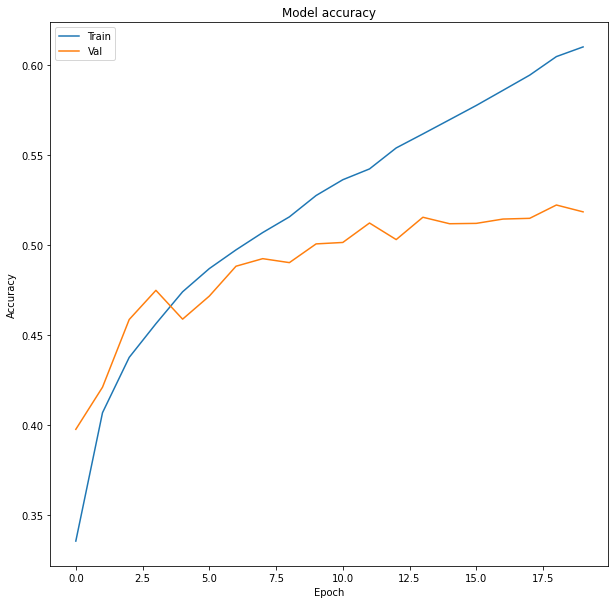

In [28]:
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

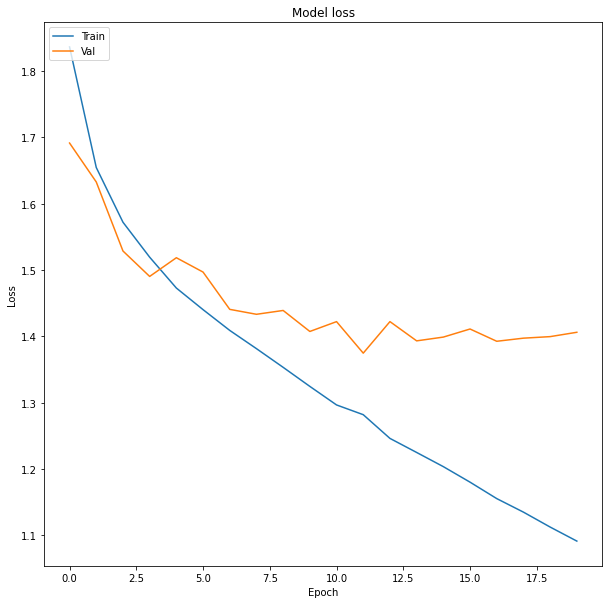

In [29]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [30]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.432762871170044
Test accuracy: 0.5054


In [0]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [0]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [0]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [0]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

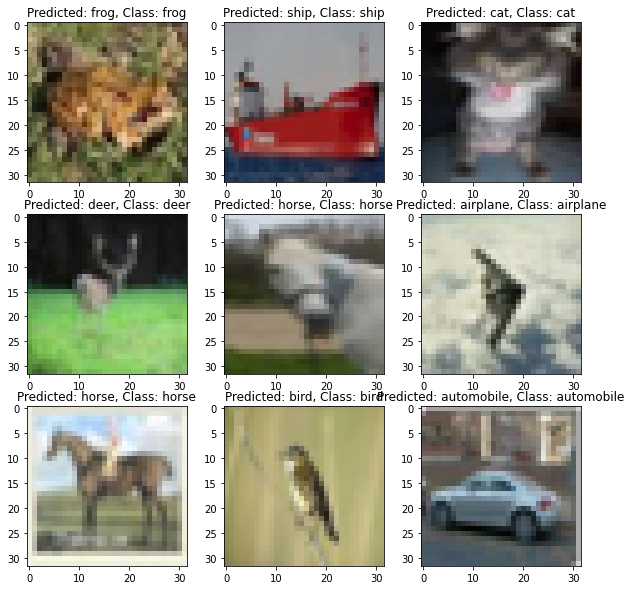

In [35]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[correct])
    y_test_str = class_to_string(y_test_scalar[correct])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

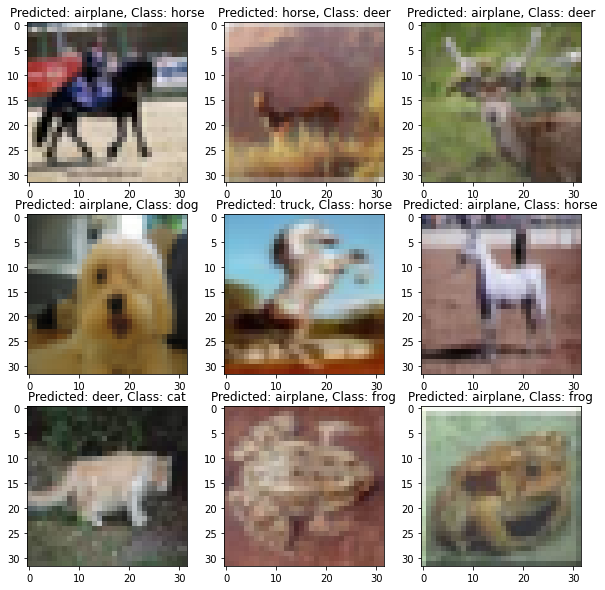

In [36]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[incorrect])
    y_test_str = class_to_string(y_test_scalar[incorrect])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

# 2. CIFAR10 with Convolutional Neural Networks

In [37]:
# Show the shape of the data partitions
print("X_train original shape:", X_train.shape)
print("y_train one-hot shape:", y_train_oh.shape)

X_train original shape: (50000, 32, 32, 3)
y_train one-hot shape: (50000, 10)


There is no need to reshape since CNN are designed to handle images, what we need to redo is the following:


1.   Change range to [0 1]
2.   Split data in validation and test



In [0]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl2 = X_train.astype('float32')
X_testval_fl2 = X_testval.astype('float32')
X_train_fl2 /= 255
X_testval_fl2 /= 255

In [39]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl2.min(), ",", 
      X_train_fl2.max(), "]")
print("Testing matrix range:", "[", X_testval_fl2.min(), ",", 
      X_testval_fl2.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [0]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val2 = X_testval_fl2[:samples_test_nb]
y_val2 = y_testval_oh[:samples_test_nb]
X_test2 = X_testval_fl2[samples_test_nb:]
y_test2 = y_testval_oh[samples_test_nb:]

In [41]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val2.shape)
print("Testing matrix shape:", X_test2.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [0]:
# Import depence for CNN
from keras.layers import Conv2D, MaxPool2D, Flatten

In [0]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
conv_layer_1 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(input_layer)
conv_layer_1 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [91]:
# Show summary of the model
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 32)          0   

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [86]:
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val2, y_val2))

Train on 50000 samples, validate on 5000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 82us/step - loss: 1.6087 - acc: 0.4113 - val_loss: 1.3282 - val_acc: 0.5216
Epoch 2/20
50000/50000 [==============================] - 3s 66us/step - loss: 1.2610 - acc: 0.5495 - val_loss: 1.1427 - val_acc: 0.6004
Epoch 3/20
50000/50000 [==============================] - 3s 69us/step - loss: 1.0982 - acc: 0.6121 - val_loss: 1.0557 - val_acc: 0.6258
Epoch 4/20
50000/50000 [==============================] - 3s 68us/step - loss: 0.9954 - acc: 0.6525 - val_loss: 0.9786 - val_acc: 0.6608
Epoch 5/20
50000/50000 [==============================] - 4s 70us/step - loss: 0.9129 - acc: 0.6797 - val_loss: 0.9175 - val_acc: 0.6832
Epoch 6/20
50000/50000 [==============================] - 3s 69us/step - loss: 0.8463 - acc: 0.7044 - val_loss: 0.8933 - val_acc: 0.6926
Epoch 7/20
50000/50000 [==============================] - 3s 67us/step - loss: 0.7921 - acc: 0.7221 - val_loss: 0.8733 - val_acc:

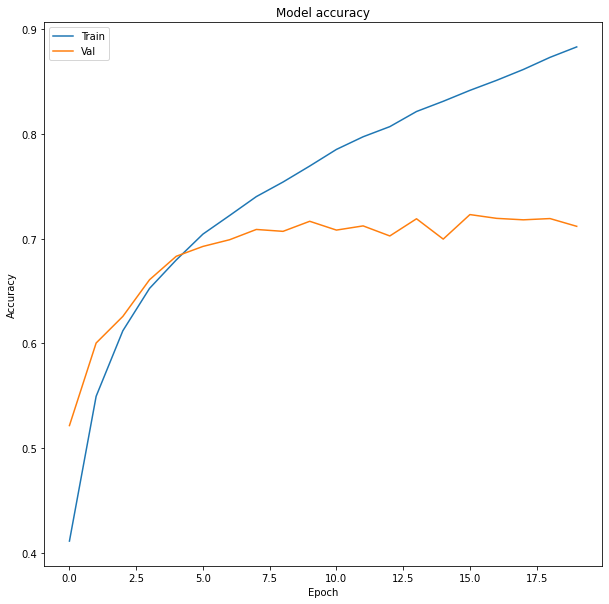

In [87]:
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

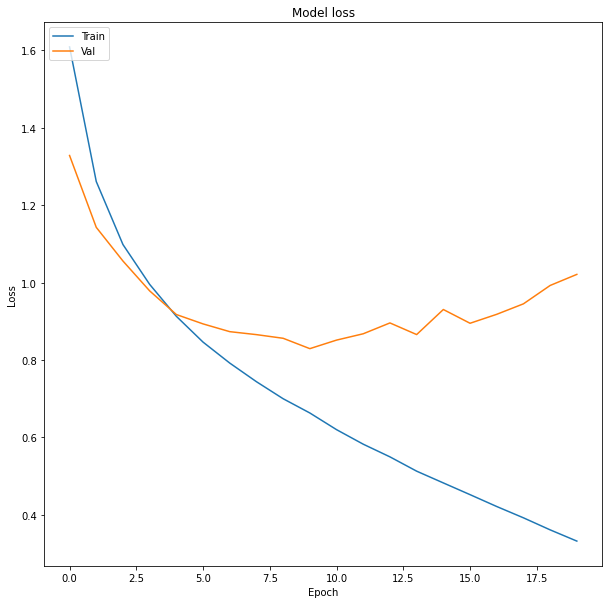

In [88]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [89]:
# Obtain metrics in the test partition
score = model.evaluate(X_test2, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.027232885169983
Test accuracy: 0.7116


In [0]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test2)
predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [0]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [0]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [0]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

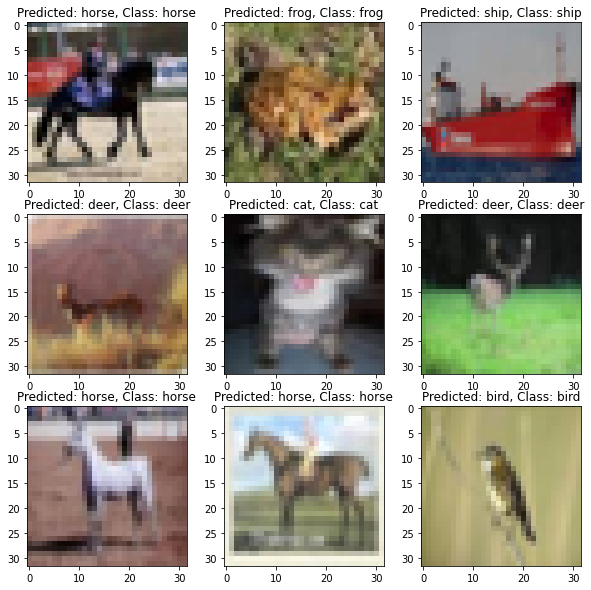

In [54]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[correct])
    y_test_str = class_to_string(y_test_scalar[correct])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

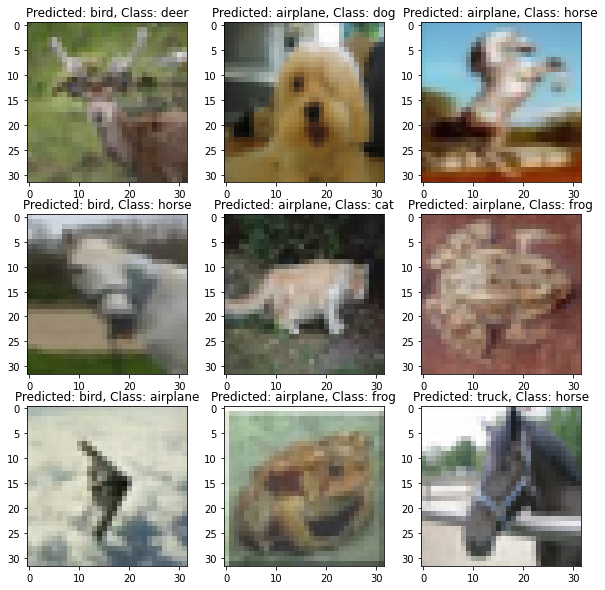

In [55]:
# Show some incorrectly classified samples
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,3), cmap='gray', 
               interpolation='none')
    predicted_str = class_to_string(predicted_classes[incorrect])
    y_test_str = class_to_string(y_test_scalar[incorrect])
    plt.title("Predicted: " + predicted_str + ", Class: " + y_test_str)

# Exercise 1: Train the CNN model with 50 epochs

In [0]:
# Train the model
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val2, y_val2))

# Exercise 2: Double the number of filters in each Conv layer and re-train

In [0]:

# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
conv_layer_1 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [100]:
# Show summary of the model
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0   

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [102]:
# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val2, y_val2))

Train on 50000 samples, validate on 5000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 73us/step - loss: 1.6785 - acc: 0.3875 - val_loss: 1.4382 - val_acc: 0.4794
Epoch 2/20
50000/50000 [==============================] - 3s 58us/step - loss: 1.3204 - acc: 0.5275 - val_loss: 1.1957 - val_acc: 0.5788
Epoch 3/20
50000/50000 [==============================] - 3s 56us/step - loss: 1.1605 - acc: 0.5899 - val_loss: 1.1025 - val_acc: 0.6110
Epoch 4/20
50000/50000 [==============================] - 3s 56us/step - loss: 1.0687 - acc: 0.6234 - val_loss: 1.0553 - val_acc: 0.6292
Epoch 5/20
50000/50000 [==============================] - 3s 56us/step - loss: 0.9854 - acc: 0.6536 - val_loss: 0.9798 - val_acc: 0.6542
Epoch 6/20
50000/50000 [==============================] - 3s 56us/step - loss: 0.9343 - acc: 0.6718 - val_loss: 0.9772 - val_acc: 0.6668
Epoch 7/20
50000/50000 [==============================] - 3s 57us/step - loss: 0.8755 - acc: 0.6932 - val_loss: 0.9762 - val_acc:

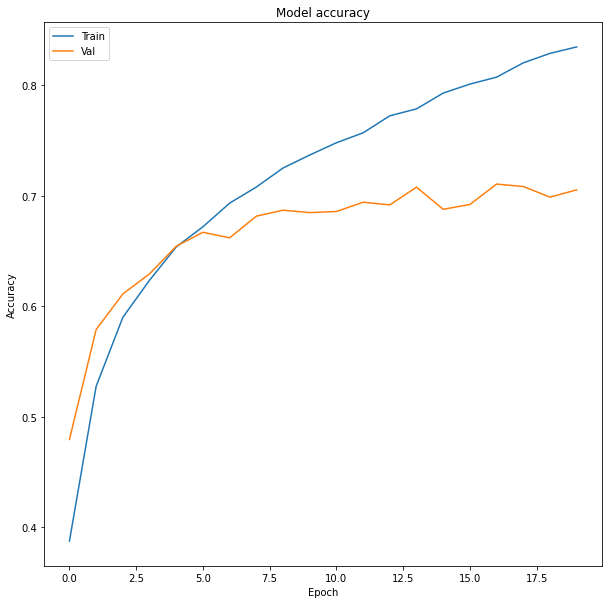

In [103]:
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

In [104]:
# Obtain metrics in the test partition
score = model.evaluate(X_test2, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.9710322031021118
Test accuracy: 0.6884


# Exercise 3: Train a CNN with 2 Conv Blocks before each Maxpooling hidden layer

In [0]:

# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
conv_layer_1 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(input_layer)
conv_layer_1 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
conv_layer_2 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [117]:
# Show summary of the model
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 32)          0  

In [0]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [119]:

# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val2, y_val2))

Train on 50000 samples, validate on 5000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 98us/step - loss: 1.6703 - acc: 0.3809 - val_loss: 1.4470 - val_acc: 0.4788
Epoch 2/20
50000/50000 [==============================] - 4s 72us/step - loss: 1.3342 - acc: 0.5194 - val_loss: 1.2428 - val_acc: 0.5562
Epoch 3/20
50000/50000 [==============================] - 4s 72us/step - loss: 1.1924 - acc: 0.5761 - val_loss: 1.1445 - val_acc: 0.5966
Epoch 4/20
50000/50000 [==============================] - 4s 74us/step - loss: 1.0819 - acc: 0.6174 - val_loss: 1.0551 - val_acc: 0.6340
Epoch 5/20
50000/50000 [==============================] - 4s 74us/step - loss: 1.0023 - acc: 0.6450 - val_loss: 0.9897 - val_acc: 0.6586
Epoch 6/20
50000/50000 [==============================] - 4s 74us/step - loss: 0.9200 - acc: 0.6745 - val_loss: 0.9678 - val_acc: 0.6708
Epoch 7/20
50000/50000 [==============================] - 4s 73us/step - loss: 0.8646 - acc: 0.6963 - val_loss: 0.9154 - val_acc:

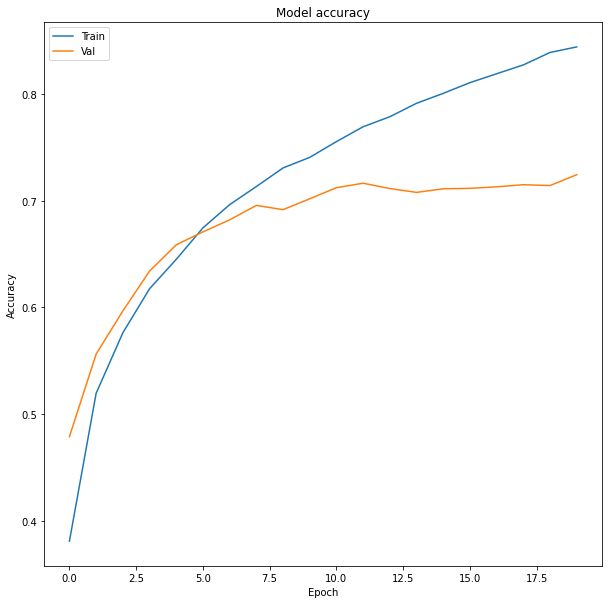

In [120]:
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

In [121]:
# Obtain metrics in the test partition
score = model.evaluate(X_test2, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.9195849397659301
Test accuracy: 0.7194


# Exercise 4: Experiment to improve results

In [0]:

# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
output_layer = Dense(10, activation='sigmoid')(dense_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [112]:
# Show summary of the model
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)               0  

In [0]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [114]:

# Train the model
history = model.fit(X_train_fl2, y_train_oh, epochs=10, batch_size=128,
                    validation_data=(X_val2, y_val2))

Train on 50000 samples, validate on 5000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 75us/step - loss: 1.7789 - acc: 0.3468 - val_loss: 1.5464 - val_acc: 0.4408
Epoch 2/10
50000/50000 [==============================] - 3s 58us/step - loss: 1.4830 - acc: 0.4679 - val_loss: 1.4325 - val_acc: 0.4866
Epoch 3/10
50000/50000 [==============================] - 3s 56us/step - loss: 1.3673 - acc: 0.5102 - val_loss: 1.3050 - val_acc: 0.5396
Epoch 4/10
50000/50000 [==============================] - 3s 57us/step - loss: 1.2908 - acc: 0.5431 - val_loss: 1.2629 - val_acc: 0.5544
Epoch 5/10
50000/50000 [==============================] - 3s 55us/step - loss: 1.2304 - acc: 0.5642 - val_loss: 1.2254 - val_acc: 0.5704
Epoch 6/10
50000/50000 [==============================] - 3s 55us/step - loss: 1.1933 - acc: 0.5776 - val_loss: 1.1926 - val_acc: 0.5840
Epoch 7/10
50000/50000 [==============================] - 3s 55us/step - loss: 1.1462 - acc: 0.5959 - val_loss: 1.1695 - val_acc:

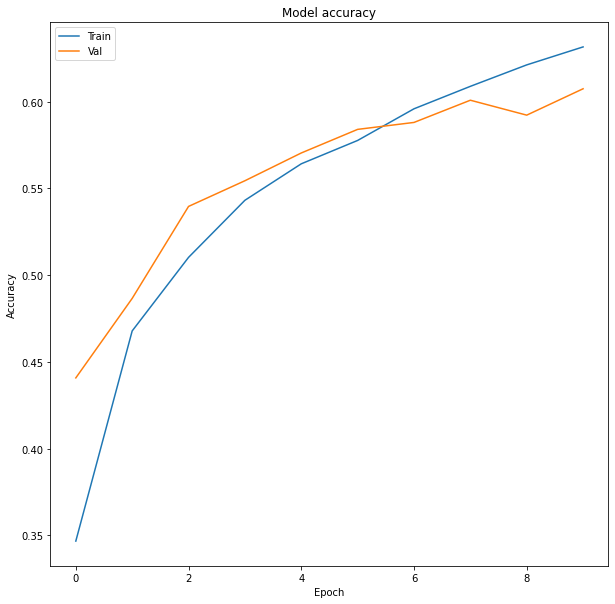

In [115]:
# Plot training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

In [0]:
# Obtain metrics in the test partition
score = model.evaluate(X_test2, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])